# Learning XOR
This notebook demonstrates a fundamental motivation of representation learning for machine learning: the XOR function.

Learning the XOR function is impossible for a separating-hyperplane based classifier, unless an alternative 
representation is employed. Neural networks can be viewed as representation learners, and can therefore learn the
XOR function (if the architecture is adequate).


In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
#source: https://chih-ling-hsu.github.io/2017/08/30/NN-XOR
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [3]:
# Build data set (XOR truth table)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

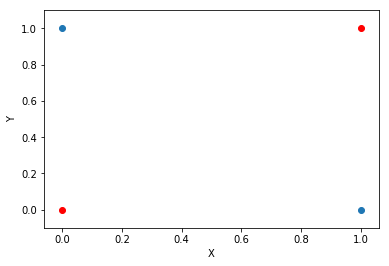

In [4]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca()

ax.scatter([0,1],[0,1], color='red')
ax.scatter([0,1],[1,0])

plt.xlabel('X')
plt.ylabel('Y')

ax.set_ylim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

plt.show()

In [7]:
# Build a network with w layers: the first one with two neurons, the second with one
# Observe that each of these neurons individually looks just like a logistic regression model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=2, input_dim=2,kernel_initializer='random_uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [8]:
# Keras models need to be compiled once they have been defined
# Here we determine the loss function, the optimization algorithm and the
# metrics to be computed during optimization
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# This call runs the optimization algorithm, as many times as specified by the "epochs" arguments
# Generally, this network will have a hard time learning the XOR function, even though it can. This illustrates
# a common problem with neural networks: they are difficult to train
model.fit(X, y, epochs=10, verbose=1, batch_size=4)

Epoch 1/10
4/4 [==============================] - 1s 270ms/step - loss: 0.7048 - acc: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 893us/step - loss: 0.7046 - acc: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 962us/step - loss: 0.7044 - acc: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 1ms/step - loss: 0.7042 - acc: 0.5000
Epoch 5/10
4/4 [==============================] - 0s 920us/step - loss: 0.7040 - acc: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 944us/step - loss: 0.7037 - acc: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 915us/step - loss: 0.7035 - acc: 0.5000
Epoch 8/10
4/4 [==============================] - 0s 939us/step - loss: 0.7033 - acc: 0.5000
Epoch 9/10
4/4 [==============================] - 0s 840us/step - loss: 0.7031 - acc: 0.5000
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.7029 - acc: 0.5000


In [10]:
# This call applies the function learned by the network to the input data
model.predict(X)

array([[0.5537432 ],
       [0.5844773 ],
       [0.5623607 ],
       [0.58992714]], dtype=float32)

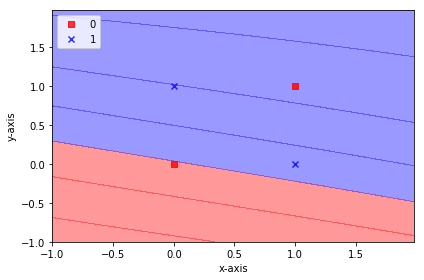

In [11]:
%matplotlib inline
plot_decision_regions(X, y, model)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
# We can print the parameters learned by the network
weights = model.get_weights()
weights

[array([[0.45609266, 0.39940047],
        [0.7021236 , 0.87512225]], dtype=float32),
 array([ 0.0099602 , -0.00995584], dtype=float32),
 array([[-0.7962386],
        [ 1.2580177]], dtype=float32),
 array([-0.00996935], dtype=float32)]